In [1]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn

from sklearn import metrics
from sklearn import preprocessing
from collections import Counter

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# data directory
# alpha_dir     = '/Users/mli171/Desktop/JHU/3Summer2022_JHU/DREAM/training_data_2022-05-27/alpha_diversity/alpha_diversity.csv'
# cst_dir       = '/Users/mli171/Desktop/JHU/3Summer2022_JHU/DREAM/training_data_2022-05-27/community_state_types/cst_valencia.csv'
meta_dir      = '/Users/mli171/Desktop/JHU/3Summer2022_JHU/DREAM/metadata_imputed1.csv'
# krdlong_dir   = '/Users/mli171/Desktop/JHU/3Summer2022_JHU/DREAM/training_data_2022-05-27/pairwise_distance/krd_distance_long.csv'
# krdwide_dir   = '/Users/mli171/Desktop/JHU/3Summer2022_JHU/DREAM/training_data_2022-05-27/pairwise_distance/krd_distance_wide.csv'
phylotype_dir = '/Users/mli171/Desktop/JHU/3Summer2022_JHU/DREAM/training_data_2022-05-27/phylotypes/phylotype_relabd.1e0.csv'
# taxonomy_dir  = '/Users/mli171/Desktop/JHU/3Summer2022_JHU/DREAM/training_data_2022-05-27/taxonomy/taxonomy_relabd.family.csv'

meta_data = pd.DataFrame(pd.read_csv(meta_dir, delimiter=','))
phylotype_data = pd.DataFrame(pd.read_csv(phylotype_dir, delimiter=','))

In [3]:
print(meta_data.shape)
print(phylotype_data.shape)
phylotype_data

(3578, 16)
(3578, 1845)


,specimen,pt__00001,pt__00002,pt__00003,pt__00004,pt__00005,pt__00006,pt__00007,pt__00008,pt__00009,...,pt__01835,pt__01836,pt__01837,pt__01838,pt__01839,pt__01840,pt__01841,pt__01842,pt__01843,pt__01844
0,A00001-05,0.797900,0.023097,0.002100,0.008924,0.007349,0.000000,0.106037,0.0,0.009449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A00002-01,0.805641,0.000613,0.006131,0.042305,0.010423,0.000000,0.000613,0.0,0.001839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A00003-02,0.963299,0.000648,0.001079,0.000000,0.011658,0.000000,0.000216,0.0,0.001079,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A00004-08,0.927544,0.000514,0.001028,0.009250,0.004625,0.000000,0.027235,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A00004-12,0.806593,0.000366,0.000549,0.014286,0.000549,0.000366,0.142857,0.0,0.000916,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573,J00111-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3574,J00112-01,0.999644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3575,J00113-01,0.483433,0.038340,0.000000,0.000000,0.000631,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3576,J00115-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
meta_data = meta_data[['participant_id', 'project', 'delivery_wk', 'collect_wk', 'age_imp', 'race_imp']]

In [5]:
for i in range(1,meta_data.shape[1]):
    if meta_data.iloc[:,i].dtypes == object:
        meta_data.iloc[:,i] = meta_data.iloc[:,i].astype('category').cat.codes + 1
        meta_data.iloc[:,i] = meta_data.iloc[:,i].astype('float64')

In [6]:
meta_data['collect_period'] = 1
meta_data['collect_period'][(meta_data['collect_wk']>=9)  & (meta_data['collect_wk']<=16)] = 2
meta_data['collect_period'][(meta_data['collect_wk']>=17) & (meta_data['collect_wk']<=24)] = 3
meta_data['collect_period'][(meta_data['collect_wk']>=25) & (meta_data['collect_wk']<=32)] = 4
meta_data['collect_period'][(meta_data['collect_wk']>32)]                                  = 5

meta_data['classlabel'] = 1*(meta_data['delivery_wk'] < 37)

/var/folders/xy/ccg9zpjj4sq_l6d6fypc_5740000gn/T/ipykernel_14906/3498266638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data['collect_period'][(meta_data['collect_wk']>=9)  & (meta_data['collect_wk']<=16)] = 2
/var/folders/xy/ccg9zpjj4sq_l6d6fypc_5740000gn/T/ipykernel_14906/3498266638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data['collect_period'][(meta_data['collect_wk']>=17) & (meta_data['collect_wk']<=24)] = 3
/var/folders/xy/ccg9zpjj4sq_l6d6fypc_5740000gn/T/ipykernel_14906/3498266638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

In [7]:
# delete the specimen_id column
phylotype_data = phylotype_data.drop('specimen', axis=1)

In [8]:
mydata = pd.concat([meta_data, phylotype_data], axis=1)

In [9]:
# filter out all samples with collection <= 32
mydata = mydata[mydata['collect_wk']<=32]

In [10]:
mydata

,participant_id,project,delivery_wk,collect_wk,age_imp,race_imp,collect_period,classlabel,pt__00001,pt__00002,...,pt__01835,pt__01836,pt__01837,pt__01838,pt__01839,pt__01840,pt__01841,pt__01842,pt__01843,pt__01844
2,A00003,1.0,40,30,32,2.0,4,0,0.963299,0.000648,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A00004,1.0,40,27,25,5.0,4,0,0.927544,0.000514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A00004,1.0,40,29,25,5.0,4,0,0.806593,0.000366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,A00004,1.0,40,30,25,5.0,4,0,0.686465,0.000853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,A00005,1.0,41,26,31,5.0,4,0,0.755714,0.003333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573,J00111,10.0,40,17,27,5.0,3,0,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3574,J00112,10.0,39,19,27,5.0,3,0,0.999644,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3575,J00113,10.0,41,16,32,5.0,2,0,0.483433,0.038340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3576,J00115,10.0,42,18,35,5.0,3,0,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
mydata = mydata.groupby(['participant_id', 'collect_period'], as_index = False).mean()

In [12]:
testproject = 10
mytraindata = mydata[mydata['project']!=testproject]
mytestdata  = mydata[mydata['project']==testproject]

In [13]:
mytrain_input = mytraindata.drop('classlabel', axis=1)
mytrain_output = mytraindata[['participant_id', 'collect_period', 'classlabel']]

mytest_input = mytestdata.drop('classlabel', axis=1)
mytest_output = mytestdata[['participant_id', 'collect_period', 'classlabel']]

In [14]:
def Data_Reshaper_Input(data, seq_length):
    num_samples = len(np.unique(data['participant_id']))
    myvary = list(data.columns.values)[5:data.shape[1]]
    num_covariates = len(myvary)
    
    myinput = np.zeros((num_samples, seq_length, num_covariates), dtype=np.float32)
    
    for i in range(num_covariates):
        data_wide = data.pivot_table(index=['participant_id'], columns='collect_period', values=myvary[i])
        data_wide = data_wide.sort_index(axis=1)
        data_wide = data_wide.fillna(0)
        tmpindex = data_wide._get_numeric_data().columns.values - 1
        tmpindex = tmpindex.tolist()
        # time varying variables need to impute all and no records are denoted as 0
        for j in range(num_samples):
                myinput[j,tmpindex,i] = data_wide.iloc[[j]]
    return myinput

In [15]:
# warning: longer time running

In [16]:
mytrain_input = Data_Reshaper_Input(mytrain_input, seq_length=4)
print(mytrain_input.shape)

(1131, 4, 1846)


In [17]:
mytest_input = Data_Reshaper_Input(mytest_input, seq_length=4)
print(mytest_input.shape)

(83, 4, 1846)


**Data_Reshaper_Output_ManytoMany**
- reshape patients class labels from long to wide form
- output array formulation, two columns, 
 - (0,0) indicating missing values;
 - (1,0) indicating preterm classes;
 - (0,1) indicating not preterm classes;

In [19]:
def Data_Reshaper_Output_ManytoMany(data, seq_length, num_covariates):
    
    num_samples = len(np.unique(data['participant_id']))

    data_wide = data.pivot_table(index=['participant_id'], columns='collect_period', values="classlabel")
    data_wide = data_wide.sort_index(axis=1)

    myoutput = np.zeros((num_samples, seq_length, num_covariates), dtype=np.float32)

    myoutput[:,data_wide.columns.values-1,0] = data_wide
    myoutput[:,data_wide.columns.values-1,1] = 1 - data_wide
    myoutput[np.isnan(myoutput)] = 0
    
    return myoutput

In [20]:
mytrain_output = Data_Reshaper_Output_ManytoMany(mytraindata, seq_length=seq_length, num_covariates=2)
print(mytrain_output.shape)

(1131, 4, 2)


In [21]:
mytraindata[0:25]

,participant_id,collect_period,project,delivery_wk,collect_wk,age_imp,race_imp,classlabel,pt__00001,pt__00002,...,pt__01835,pt__01836,pt__01837,pt__01838,pt__01839,pt__01840,pt__01841,pt__01842,pt__01843,pt__01844
0,A00003,4,1.0,40.0,30.000000,32.0,2.0,0.0,0.963299,0.000648,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A00004,4,1.0,40.0,28.666667,25.0,5.0,0.0,0.806867,0.000578,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A00005,4,1.0,41.0,27.500000,31.0,5.0,0.0,0.834559,0.002062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A00006,4,1.0,41.0,31.000000,28.0,5.0,0.0,0.762941,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A00008,3,1.0,35.0,17.000000,38.0,5.0,1.0,0.156391,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,A00008,4,1.0,35.0,29.750000,38.0,5.0,1.0,0.308081,0.000461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,A00009,4,1.0,37.0,29.333333,32.0,2.0,0.0,0.563436,0.009292,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,A00010,4,1.0,38.0,29.250000,30.0,5.0,0.0,0.441841,0.089073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,A00011,3,1.0,38.0,24.000000,30.0,4.0,0.0,0.165963,0.052743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,A00011,4,1.0,38.0,28.666667,30.0,4.0,0.0,0.506906,0.003719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
mytrain_output[4,:,:]

array([[0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [23]:
mytrain_output[7,:,:]

array([[0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [24]:
mytrain_output[11,:,:]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.]], dtype=float32)

### Defining RNN model

In [71]:
class Model1(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(Model1, self).__init__()

        # Defining some parameters
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Defining the layers
        # RNN Layer
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)   
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x):
        
        batch_size = x.size(0)

        #Initializing hidden state for first input using method defined below
        hidden = self.init_hidden(batch_size)

        # Passing in the input and hidden state into the model and obtaining outputs
        out, hidden = self.rnn(x, hidden)

        # Reshaping the outputs such that it can be fit into the fully connected layer
        # out = out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(out)
        
        return out, hidden
    
    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim).to(device)
         # We'll send the tensor holding the hidden state to the device we specified earlier as well
        return hidden

# RNN batch-training

### Model hyperparameters set-up

In [72]:
batch_size = 100
lr = 0.0001
verbose = True

# Setup the RNN and training settings
hidden_dim = 30
n_layers = 1
max_epochs = 500

model = Model1(input_size=mytrain_input.shape[2], output_size=mytrain_output.shape[2], hidden_dim=hidden_dim, n_layers=n_layers)

# # better to use when train binary classification (Many to One)
# criterion = nn.CrossEntropyLoss()

# better to use when many to many cases
criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [73]:
# Automatically determine the device that PyTorch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = model.to(device)

# Track the value of the loss function and model accuracy across epochs
history_train = {'loss': [], 'acc': []}

epoch = 0

In [74]:
# Set the model to training mode. This will turn on layers that would
# otherwise behave differently during evaluation, such as dropout
model.train()

# Store the number of sequences that were classified correctly
num_correct = 0

batch_idx = 0

In [75]:
# subset a batch of sequences and class labels
tmpindex = list(range(batch_idx, min(batch_idx+batch_size, mytrain_input.shape[0])))
mytrain_input_batch  = mytrain_input[tmpindex,:]
mytrain_output_batch = mytrain_output[tmpindex,:]

# convert them into tensors object for Pytorch and send them to the selected device
mytrain_input_batch  = torch.from_numpy(mytrain_input_batch).float().to(device)
mytrain_output_batch = torch.from_numpy(mytrain_output_batch).float().to(device)
        
# forward pass of RNN model
output, hidden = model(mytrain_input_batch)
output_prob = nn.functional.softmax(output, dim=2)


In [76]:
ii = 4
output_prob[ii,:,:]

tensor([[0.5486, 0.4514],
        [0.5708, 0.4292],
        [0.7927, 0.2073],
        [0.8019, 0.1981]], grad_fn=<SliceBackward0>)

In [77]:
mytrain_output_batch[ii,:,:]

tensor([[0., 0.],
        [0., 0.],
        [1., 0.],
        [1., 0.]])

In [78]:
print(output_prob[ii,3,0])
tmppred = 1*(output_prob[ii,3,0] > 0.5)
tmppred

tensor(0.8019, grad_fn=<SelectBackward0>)


tensor(1)

In [79]:
tmptrainoutput = max(mytrain_output_batch[ii,:,0])
tmptrainoutput

tensor(1.)

In [80]:
def Batch_Train(model, mytrain_input, mytrain_output, criterion, optimizer, device, batch_size):
    # Set the model to training mode. This will turn on layers that would
    # otherwise behave differently during evaluation, such as dropout
    model.train()
    
    # Store the number of sequences that were classified correctly
    num_correct = 0
    
    # Iterate over every batch of sequences
    for batch_idx in range(0, mytrain_input.shape[0], batch_size):
        
        # subset a batch of sequences and class labels
        tmpindex = list(range(batch_idx, min(batch_idx+batch_size, mytrain_input.shape[0])))
        mytrain_input_batch  = mytrain_input[tmpindex,:]
        mytrain_output_batch = mytrain_output[tmpindex,:]
        
        # convert them into tensors object for Pytorch and send them to the selected device
        mytrain_input_batch  = torch.from_numpy(mytrain_input_batch).float().to(device)
        mytrain_output_batch = torch.from_numpy(mytrain_output_batch).float().to(device)
        
        # forward pass of RNN model
        output, hidden = model(mytrain_input_batch)
        output_prob = nn.functional.softmax(output, dim=2)

        # using softmax() to form class probabilities on last dim of tensor (2)
        loss = criterion(output_prob, mytrain_output_batch)
        
        # Clear existing gradients from previous epoch
        optimizer.zero_grad()
        
        # backpropagation and gradients calculation
        loss.backward()
        
        # Updates the weights
        optimizer.step()    
        
        # change to class probabilities
        for ii in range(mytrain_input_batch.shape[0]):
            # tmppred = 1*(output_prob[ii,3,0] > 0.5) + 1
            tmppred = 1*(output_prob[ii,3,0] > 0.5)
            tmptrainoutput = max(mytrain_output_batch[ii,:,0])
            num_correct += 1*(tmptrainoutput == tmppred)
        
    return num_correct, loss.item()

In [81]:
# Automatically determine the device that PyTorch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = model.to(device)

# Track the value of the loss function and model accuracy across epochs
history_train = {'loss': [], 'acc': []}

for epoch in range(max_epochs):
    
    # Run the training loop and calculate the accuracy
    num_correct, loss = Batch_Train(model, mytrain_input, mytrain_output, criterion, optimizer, device, batch_size)
    accuracy = float(num_correct) / (len(mytrain_input))*100
    history_train['loss'].append(loss)
    history_train['acc'].append(accuracy)
    
    if verbose or epoch + 1 == max_epochs:
            print(f'[Epoch {epoch + 1}/{max_epochs}]'
                  f" loss: {history_train['loss'][-1]:.4f}, acc: {history_train['acc'][-1]:2.2f}%")

[Epoch 1/500] loss: 0.3226, acc: 33.07%
[Epoch 2/500] loss: 0.3159, acc: 33.07%
[Epoch 3/500] loss: 0.3093, acc: 33.07%
[Epoch 4/500] loss: 0.3028, acc: 33.07%
[Epoch 5/500] loss: 0.2965, acc: 33.07%
[Epoch 6/500] loss: 0.2904, acc: 33.07%
[Epoch 7/500] loss: 0.2845, acc: 33.16%
[Epoch 8/500] loss: 0.2788, acc: 37.22%
[Epoch 9/500] loss: 0.2734, acc: 47.75%
[Epoch 10/500] loss: 0.2684, acc: 54.73%
[Epoch 11/500] loss: 0.2638, acc: 57.38%
[Epoch 12/500] loss: 0.2595, acc: 58.97%
[Epoch 13/500] loss: 0.2556, acc: 58.97%
[Epoch 14/500] loss: 0.2521, acc: 59.06%
[Epoch 15/500] loss: 0.2490, acc: 56.94%
[Epoch 16/500] loss: 0.2463, acc: 59.86%
[Epoch 17/500] loss: 0.2438, acc: 64.01%
[Epoch 18/500] loss: 0.2417, acc: 64.46%
[Epoch 19/500] loss: 0.2398, acc: 62.95%
[Epoch 20/500] loss: 0.2381, acc: 62.07%
[Epoch 21/500] loss: 0.2366, acc: 61.54%
[Epoch 22/500] loss: 0.2353, acc: 60.04%
[Epoch 23/500] loss: 0.2342, acc: 59.86%
[Epoch 24/500] loss: 0.2332, acc: 59.50%
[Epoch 25/500] loss: 0.23

[Epoch 200/500] loss: 0.2237, acc: 45.18%
[Epoch 201/500] loss: 0.2237, acc: 44.92%
[Epoch 202/500] loss: 0.2236, acc: 44.83%
[Epoch 203/500] loss: 0.2236, acc: 44.74%
[Epoch 204/500] loss: 0.2236, acc: 43.77%
[Epoch 205/500] loss: 0.2236, acc: 43.41%
[Epoch 206/500] loss: 0.2236, acc: 43.06%
[Epoch 207/500] loss: 0.2236, acc: 42.09%
[Epoch 208/500] loss: 0.2236, acc: 41.73%
[Epoch 209/500] loss: 0.2236, acc: 41.20%
[Epoch 210/500] loss: 0.2235, acc: 40.41%
[Epoch 211/500] loss: 0.2235, acc: 39.61%
[Epoch 212/500] loss: 0.2235, acc: 39.43%
[Epoch 213/500] loss: 0.2235, acc: 39.26%
[Epoch 214/500] loss: 0.2235, acc: 39.26%
[Epoch 215/500] loss: 0.2235, acc: 39.17%
[Epoch 216/500] loss: 0.2234, acc: 39.52%
[Epoch 217/500] loss: 0.2234, acc: 40.05%
[Epoch 218/500] loss: 0.2234, acc: 40.58%
[Epoch 219/500] loss: 0.2234, acc: 41.20%
[Epoch 220/500] loss: 0.2234, acc: 41.38%
[Epoch 221/500] loss: 0.2234, acc: 41.38%
[Epoch 222/500] loss: 0.2233, acc: 41.38%
[Epoch 223/500] loss: 0.2233, acc:

[Epoch 396/500] loss: 0.2205, acc: 64.10%
[Epoch 397/500] loss: 0.2205, acc: 64.01%
[Epoch 398/500] loss: 0.2205, acc: 63.93%
[Epoch 399/500] loss: 0.2205, acc: 64.01%
[Epoch 400/500] loss: 0.2205, acc: 64.01%
[Epoch 401/500] loss: 0.2205, acc: 64.10%
[Epoch 402/500] loss: 0.2205, acc: 64.28%
[Epoch 403/500] loss: 0.2204, acc: 64.28%
[Epoch 404/500] loss: 0.2204, acc: 64.72%
[Epoch 405/500] loss: 0.2204, acc: 64.63%
[Epoch 406/500] loss: 0.2204, acc: 64.99%
[Epoch 407/500] loss: 0.2204, acc: 65.16%
[Epoch 408/500] loss: 0.2204, acc: 65.25%
[Epoch 409/500] loss: 0.2204, acc: 65.25%
[Epoch 410/500] loss: 0.2204, acc: 65.16%
[Epoch 411/500] loss: 0.2204, acc: 65.16%
[Epoch 412/500] loss: 0.2204, acc: 65.43%
[Epoch 413/500] loss: 0.2204, acc: 65.34%
[Epoch 414/500] loss: 0.2204, acc: 65.34%
[Epoch 415/500] loss: 0.2204, acc: 65.52%
[Epoch 416/500] loss: 0.2204, acc: 65.52%
[Epoch 417/500] loss: 0.2204, acc: 65.69%
[Epoch 418/500] loss: 0.2204, acc: 65.78%
[Epoch 419/500] loss: 0.2204, acc:

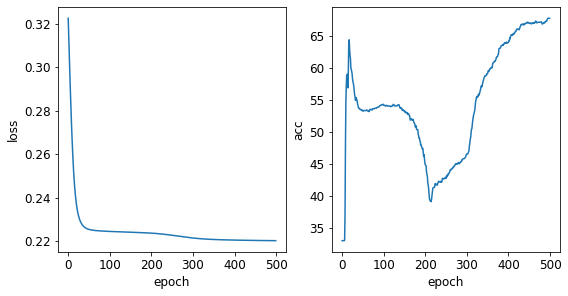

In [82]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4.5))
for ax, metric in zip(axes, ['loss', 'acc']):
    ax.plot(history_train[metric])
    ax.set_xlabel('epoch', fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
plt.show()

# prediction

In [83]:
def Test(model, mytest_input, device, threshold):
    
    # Set the model to evaluation mode. This will turn off layers that would
    # otherwise behave differently during training, such as dropout.
    model.eval()
    
    mytest_input_rnn  = torch.from_numpy(mytest_input).float().to(device)

    mytest_output_rnn, hidden = model(mytest_input_rnn)
    output_prob = nn.functional.softmax(mytest_output_rnn, dim=2).detach().numpy()
    
    # the decision is made from the 4th period's probability
    pred_res = output_prob[:,3,0]
    pred_labels = 1*(pred_res > threshold)
    
    return pred_labels, pred_res

In [84]:
pred_labels, pred_res = Test(model, mytest_input, device, threshold=0.5)
pred_labels

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [85]:
pred_res

array([0.50638145, 0.48395917, 0.48223758, 0.47666153, 0.49958035,
       0.5089327 , 0.47645345, 0.4652291 , 0.51044583, 0.4773967 ,
       0.5000169 , 0.49034044, 0.49865344, 0.49748254, 0.4749795 ,
       0.4773967 , 0.48224148, 0.50724053, 0.48108786, 0.47431886,
       0.5079281 , 0.49748254, 0.49663523, 0.47522283, 0.47803485,
       0.5099947 , 0.51396406, 0.48343548, 0.47441623, 0.4746631 ,
       0.49881092, 0.5310752 , 0.4761132 , 0.48347315, 0.47570622,
       0.50566345, 0.49092633, 0.47877824, 0.556627  , 0.47803167,
       0.47404382, 0.4951779 , 0.47467554, 0.4924293 , 0.48224294,
       0.4757214 , 0.4794996 , 0.48075664, 0.48108786, 0.47645235,
       0.4773967 , 0.4743597 , 0.49610937, 0.47897854, 0.47803167,
       0.51698965, 0.51192683, 0.49114013, 0.4752723 , 0.503235  ,
       0.48067442, 0.48797494, 0.4963379 , 0.4817954 , 0.47432122,
       0.4740305 , 0.50003076, 0.50566345, 0.47645968, 0.48309293,
       0.47662136, 0.50488317, 0.5153777 , 0.4784413 , 0.47742

In [86]:
testdata_wide = mytestdata.pivot_table(index=['participant_id'], columns='collect_period', values="classlabel")
testdata_wide = testdata_wide.sort_index(axis=1)

actual_labels = []
for i in range(testdata_wide.shape[0]):
    actual_labels.append(np.nanmax(testdata_wide.iloc[i,:]))
actual_labels = np.array(actual_labels)
actual_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [87]:
confusion = metrics.confusion_matrix(actual_labels, pred_labels)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[55 13]
 [10  5]]


In [88]:
specificity = TN / (TN + FP)
print(specificity)
sensitivity = TP / (TP + FN)
print(sensitivity)
precision = TP/(TP + FP)
print(precision)

0.8088235294117647
0.3333333333333333
0.2777777777777778


In [89]:
fpr, tpr, thresholds = metrics.roc_curve(actual_labels, pred_res)
thresholdData = {'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds}
thresholdData = pd.DataFrame(thresholdData)
thresholdData

,fpr,tpr,thresholds
0,0.000000,0.000000,1.556627
1,0.014706,0.000000,0.556627
2,0.029412,0.000000,0.531075
3,0.029412,0.066667,0.516990
4,0.058824,0.066667,0.513964
5,0.058824,0.266667,0.509995
6,0.117647,0.266667,0.506381
7,0.147059,0.266667,0.505663
8,0.161765,0.266667,0.504883
9,0.161765,0.333333,0.503235


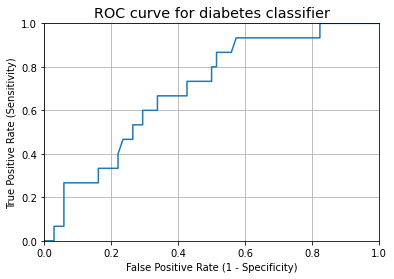

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [91]:
print(metrics.roc_auc_score(actual_labels, pred_res))

0.6970588235294117
